# Figure 2: Intersection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.interpolate import InterpolatedUnivariateSpline

import smpsite as smp

%matplotlib inline

In [2]:
df = pd.read_csv('../../outputs/fig2c_20000sim.csv')
df

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_25,error_angle_75,error_angle_95,error_angle_std,n_tot,n,k,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers
0,0,5.379313,5.019890,3.256350,7.137635,10.605374,2.851950,40,8,5,50,30.0,0.0,0.52,G,NaN,True
1,0,7.375292,6.643824,4.218760,9.711184,15.346991,4.290830,40,40,1,50,30.0,0.0,0.36,G,NaN,False
2,0,2.958618,2.752207,1.774162,3.936022,5.878363,1.597515,40,40,1,50,30.0,0.0,0.02,G,NaN,False
3,0,10.745256,9.576898,6.021911,14.149884,22.827837,6.490554,40,40,1,50,30.0,0.0,0.50,G,NaN,False
4,0,4.741156,4.463213,2.839764,6.289516,9.315424,2.500368,40,8,5,50,30.0,0.0,0.00,G,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,4.017481,3.713536,2.379718,5.354330,8.074778,2.197198,40,40,1,50,30.0,0.0,0.12,G,NaN,False
58,0,6.393598,5.841472,3.720894,8.433402,13.137185,3.621199,40,40,1,50,30.0,0.0,0.30,G,NaN,False
59,0,14.626240,12.765825,7.938976,19.037486,32.205676,9.442613,40,40,1,50,30.0,0.0,0.60,G,NaN,False
60,0,5.150654,4.829007,3.123012,6.843455,10.106266,2.704473,40,8,5,50,30.0,0.0,0.42,G,NaN,True


In [3]:
def inverse(f, delta=1e-8):
    """Given a function y = f(x) that is a monotonically increasing function on
    non-negative numbers, return the function x = f_1(y) that is an approximate
    inverse, picking the closest value to the inverse, within delta."""
    def f_1(y):
        low, high = 0, 1000000000
        last, mid = 0, high/2
        while abs(mid-last) > delta:
            if f(mid) < y:
                low = mid
            else:
                high = mid
            last, mid = mid, (low + high)/2
        return mid
    return f_1

rho_kappa_inverse = inverse(lambda x: smp.rho_kappa(x, n=2))

In [5]:
df1 = df[df.k==1].sort_values(by="outlier_rate")
df5 = df[df.k==5].sort_values(by="outlier_rate")

# For n0=1 the approximation with outliers is going to be very bad.
df1["error_kappa_theoretical"] = df1.apply(lambda row: smp.kappa_theoretical(smp.Params(N=row.n, 
                                                                                        n0=row.k , 
                                                                                        kappa_within_site=row.kappa_within_site,
                                                                                        site_lat=row.site_lat,
                                                                                        site_long=row.site_long, 
                                                                                        outlier_rate=row.outlier_rate, 
                                                                                        secular_method=row.secular_method, 
                                                                                        kappa_secular=row.kappa_secular)), axis=1, result_type='expand')

df5["error_kappa_theoretical"] = df5.apply(lambda row: smp.kappa_theoretical(smp.Params(N=row.n, 
                                                                                        n0=row.k * (1 - row.outlier_rate), 
                                                                                        kappa_within_site=row.kappa_within_site,
                                                                                        site_lat=row.site_lat,
                                                                                        site_long=row.site_long, 
                                                                                        outlier_rate=0.0, 
                                                                                        secular_method=row.secular_method, 
                                                                                        kappa_secular=row.kappa_secular)), axis=1, result_type='expand')

df1["error_angle_theoretical"] = df1.apply(lambda row: float(smp.kappa2angular(row.error_kappa_theoretical)), axis=1)
df5["error_angle_theoretical"] = df5.apply(lambda row: float(smp.kappa2angular(row.error_kappa_theoretical)), axis=1)

719.7842554288965
46.81315013965737
719.7842554288965
24.19331446845696
719.7842554288965
16.31163127346902
719.7842554288965
12.30342800417894
719.7842554288965
9.876506151806907
719.7842554288965
8.249278321548204
719.7842554288965
7.082342928788066
719.7842554288965
6.204429209288875
719.7842554288965
5.519636586681642
719.7842554288965
4.969984618297119
719.7842554288965
4.518311197410085
719.7842554288965
4.139700332528307
719.7842554288965
3.8168478988520604
719.7842554288965
3.5373927731452426
719.7842554288965
3.292296907320136
719.7842554288965
3.0748193047269723
719.7842554288965
2.879843680192451
719.7842554288965
2.703425566741302
719.7842554288965
2.542480276312986
719.7842554288965
2.3945637306344025
719.7842554288965
2.2577159086711873
719.7842554288965
2.1303472930167544
719.7842554288965
2.0111553589163833
719.7842554288965
1.899062301857768
719.7842554288965
1.7931682527727588
719.7842554288965
1.6927153956292074
719.7842554288965
1.5970604672066457
719.7842554288965


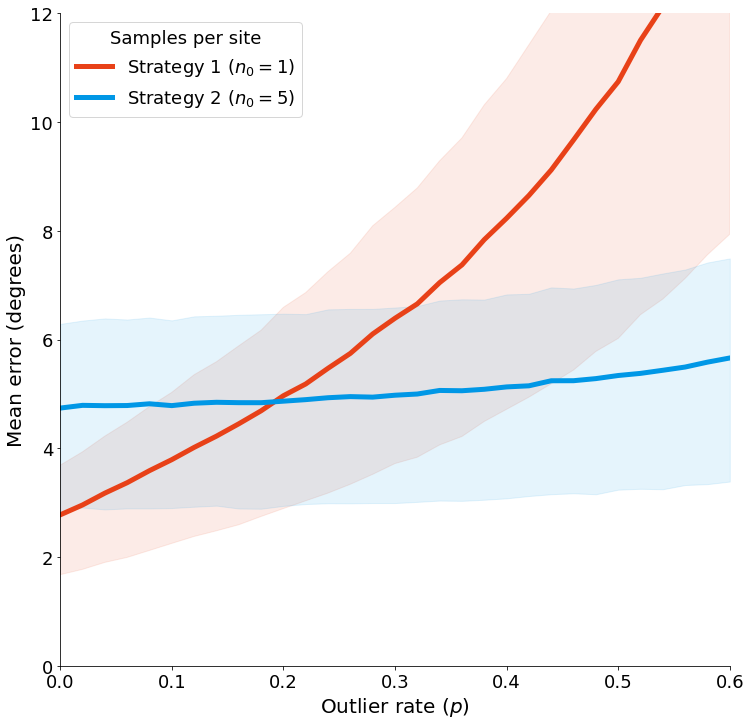

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(12,12))

sns.lineplot(ax=ax, data=df, x="outlier_rate", y="error_angle_mean", hue="k", lw=5, palette=["#e84118", "#0097e6"])
# sns.lineplot(ax=ax, data=df1, x="outlier_rate", y="error_angle_theoretical", hue="k", lw=1.5, label="1 theo", color='g')
# sns.lineplot(ax=ax, data=df5, x="outlier_rate", y="error_angle_theoretical", hue="k", lw=1.5, label="5 theo", color='y')

plt.fill_between(df1.outlier_rate, df1.error_angle_25, df1.error_angle_75, color="#e84118", alpha=0.1)
plt.fill_between(df5.outlier_rate, df5.error_angle_25, df5.error_angle_75, color="#0097e6", alpha=0.1)


plt.plot

plt.xlabel("Outlier rate ($p$)", fontsize=20)
plt.ylabel("Mean error (degrees)", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(np.arange(0, 0.70, 0.1), fontsize=18)
plt.xlim(0, 0.6)
plt.ylim(0, 12)
plt.legend(title="Samples per site", loc="upper left", fontsize=18, title_fontsize=18, labels=["Strategy 1 ($n_0=1$)", "Strategy 2 ($n_0=5$)"])
ax.spines[['right', 'top']].set_visible(False)

plt.show()
plt.savefig("Figure3c.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure3c.png", format="png", bbox_inches='tight')